In [2]:
import pandas as pd
import numpy as np
from pyomo.environ import *

In [2]:
imbalance = pd.read_csv('imbalance_prices.csv')

In [3]:
imbalance

,START_DATETIME_UTC,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH
0,2025-05-04 22:00:00.000 Z,36.76,36.76
1,2025-05-04 22:15:00.000 Z,28.58,28.58
2,2025-05-04 22:30:00.000 Z,28.58,28.58
3,2025-05-04 22:45:00.000 Z,34.68,34.68
4,2025-05-04 23:00:00.000 Z,34.58,34.58
...,...,...,...
667,2025-05-11 20:45:00.000 Z,54.57,54.57
668,2025-05-11 21:00:00.000 Z,63.00,149.40
669,2025-05-11 21:15:00.000 Z,60.57,101.70
670,2025-05-11 21:30:00.000 Z,60.12,111.00


<AxesSubplot: >

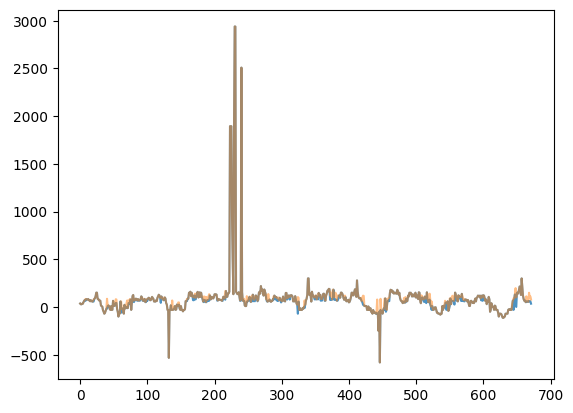

In [9]:
imbalance['IMBALANCE_LONG_EUR_MWH'].plot(alpha = 0.8)
imbalance['IMBALANCE_SHORT_EUR_MWH'].plot(alpha = 0.5)

<AxesSubplot: >

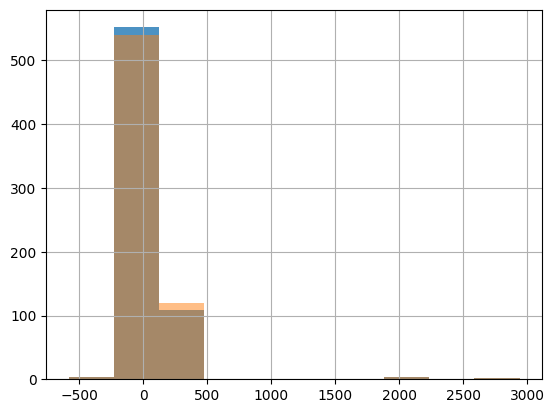

In [19]:
imbalance['IMBALANCE_LONG_EUR_MWH'].hist(alpha = 0.8)
imbalance['IMBALANCE_SHORT_EUR_MWH'].hist(alpha = 0.5)

In [16]:
imbalance[imbalance['IMBALANCE_LONG_EUR_MWH'] != imbalance['IMBALANCE_SHORT_EUR_MWH']]

,START_DATETIME_UTC,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH
8,2025-05-05 00:00:00.000 Z,65.50,84.00
20,2025-05-05 03:00:00.000 Z,57.08,78.56
40,2025-05-05 08:00:00.000 Z,-16.35,86.36
52,2025-05-05 11:00:00.000 Z,16.98,42.29
53,2025-05-05 11:15:00.000 Z,42.29,81.77
...,...,...,...
664,2025-05-11 20:00:00.000 Z,51.98,111.98
668,2025-05-11 21:00:00.000 Z,63.00,149.40
669,2025-05-11 21:15:00.000 Z,60.57,101.70
670,2025-05-11 21:30:00.000 Z,60.12,111.00


In [14]:
imbalance.isna().sum()

START_DATETIME_UTC         0
IMBALANCE_LONG_EUR_MWH     0
IMBALANCE_SHORT_EUR_MWH    0
dtype: int64

In [10]:
imbalance.describe()

,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH
count,672.000000,672.000000
mean,84.771310,93.898348
std,245.572427,244.751357
min,-581.130000,-581.130000
25%,16.480000,40.500000
50%,67.365000,83.990000
75%,109.085000,119.375000
max,2940.000000,2940.000000


In [11]:
imbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   START_DATETIME_UTC       672 non-null    object 
 1   IMBALANCE_LONG_EUR_MWH   672 non-null    float64
 2   IMBALANCE_SHORT_EUR_MWH  672 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.9+ KB


In [20]:
imbalance['START_DATETIME_UTC'] = pd.to_datetime(imbalance['START_DATETIME_UTC'])

In [21]:
imbalance

,START_DATETIME_UTC,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH
0,2025-05-04 22:00:00+00:00,36.76,36.76
1,2025-05-04 22:15:00+00:00,28.58,28.58
2,2025-05-04 22:30:00+00:00,28.58,28.58
3,2025-05-04 22:45:00+00:00,34.68,34.68
4,2025-05-04 23:00:00+00:00,34.58,34.58
...,...,...,...
667,2025-05-11 20:45:00+00:00,54.57,54.57
668,2025-05-11 21:00:00+00:00,63.00,149.40
669,2025-05-11 21:15:00+00:00,60.57,101.70
670,2025-05-11 21:30:00+00:00,60.12,111.00


In [22]:
imbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   START_DATETIME_UTC       672 non-null    datetime64[ns, UTC]
 1   IMBALANCE_LONG_EUR_MWH   672 non-null    float64            
 2   IMBALANCE_SHORT_EUR_MWH  672 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 15.9 KB


In [24]:
cols = ['IMBALANCE_LONG_EUR_MWH', 'IMBALANCE_SHORT_EUR_MWH']
imbalance['IMBALANCE_SELLING_PRICE'] = imbalance[cols].min(axis=1)

In [25]:
imbalance

,START_DATETIME_UTC,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH,IMBALANCE_SELLING_PRICE
0,2025-05-04 22:00:00+00:00,36.76,36.76,36.76
1,2025-05-04 22:15:00+00:00,28.58,28.58,28.58
2,2025-05-04 22:30:00+00:00,28.58,28.58,28.58
3,2025-05-04 22:45:00+00:00,34.68,34.68,34.68
4,2025-05-04 23:00:00+00:00,34.58,34.58,34.58
...,...,...,...,...
667,2025-05-11 20:45:00+00:00,54.57,54.57,54.57
668,2025-05-11 21:00:00+00:00,63.00,149.40,63.00
669,2025-05-11 21:15:00+00:00,60.57,101.70,60.57
670,2025-05-11 21:30:00+00:00,60.12,111.00,60.12


In [26]:
imbalance[imbalance['IMBALANCE_LONG_EUR_MWH'] != imbalance['IMBALANCE_SHORT_EUR_MWH']]

,START_DATETIME_UTC,IMBALANCE_LONG_EUR_MWH,IMBALANCE_SHORT_EUR_MWH,IMBALANCE_SELLING_PRICE
8,2025-05-05 00:00:00+00:00,65.50,84.00,65.50
20,2025-05-05 03:00:00+00:00,57.08,78.56,57.08
40,2025-05-05 08:00:00+00:00,-16.35,86.36,-16.35
52,2025-05-05 11:00:00+00:00,16.98,42.29,16.98
53,2025-05-05 11:15:00+00:00,42.29,81.77,42.29
...,...,...,...,...
664,2025-05-11 20:00:00+00:00,51.98,111.98,51.98
668,2025-05-11 21:00:00+00:00,63.00,149.40,63.00
669,2025-05-11 21:15:00+00:00,60.57,101.70,60.57
670,2025-05-11 21:30:00+00:00,60.12,111.00,60.12


In [ ]:
# check if in all ptus with dual pricing the short price is higher than the long price
# this matters for how objective function should be formulated if you want to implement
# worst case scenario: in case of dual pricing you get the worst price

S = imbalance["IMBALANCE_SHORT_EUR_MWH"]
L = imbalance["IMBALANCE_LONG_EUR_MWH"]

dual = S.ne(L)
print("dual PTUs:", dual.sum())

# Are all dual windows S >= L?
print("all dual have short >= long? ", bool((S[dual] >= L[dual]).all()))